In [1]:
import pandas as pd
import numpy as np
import nltk

# 1-Loading DataSet

In [6]:
df=pd.read_csv("train.csv")

#2-head and info

In [7]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


#3-Missing Data

In [9]:
#From the info we can find that there is missing data in Keyword and location columns
Keyword_Missing_Data=((7613-7552)/7613)*100
Location_Missing_Data=((7613-5080)/7613)*100
Keyword_Missing_Data,Location_Missing_Data

df.isnull().sum()/len(df)

id          0.000000
keyword     0.008013
location    0.332720
text        0.000000
target      0.000000
dtype: float64

#4-Data in each class

In [10]:
#We can get that from info
# id        7613
# keyword   7552
# location  5080
# text      7613
# target    7613 


#5-Top 15 location of the data

In [11]:
df['location'][:15]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
Name: location, dtype: object

#6-Top 15 Keywords in the data

In [12]:
df['keyword'][:15]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
Name: keyword, dtype: object

#7-Most common word

In [13]:
df['keyword'].value_counts()
#word fatalities is the most common word

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

#8-Most Common Stop word

In [14]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
Stop_words_count={}
for tweets in range(len(df)):
  for word in df['text'][tweets].split():
    key=word
    if word in stop_words:
      if word not in Stop_words_count.keys(): 
        Stop_words_count[key]=1  
      else :
        Stop_words_count[key]+=1   

max_value = max(Stop_words_count, key=Stop_words_count.get)    
max_value,Stop_words_count[max_value]       

('the', 2575)

#9-Preparing DataSet

In [16]:
tweets=[]
for tweet in range(len(df)):
  tweets.append(df['text'][tweet])

Cleaning Data

In [17]:
from nltk.stem import PorterStemmer
import re 

def process_tweets(tweets):
    clean_tweets=[]
    stemmer=PorterStemmer()

    for tweet in tweets:
        #clean tweet
        tweet=re.sub(r'(@|#)[a-zA-Z0-9_]+',"",tweet)# remove hash $ mention
        tweet=re.sub(r'https?:\/\/\S+',"",tweet) # remove hyperlink
        tweet=re.sub(r'\W'," ",tweet) # remove special chacters 
        tweet=re.sub(r'\s[0-9]+\s'," ",tweet) # remove numbers
        tweet=re.sub('^\s+',"",tweet) # remove spaces
        tweet=re.sub('\s+$',"",tweet) # remove spaces

        # remove stops words and stemming 
        clean_tweet=[stemmer.stem(word.lower()) for word in tweet.split() if word.lower() not in stop_words]

        clean_tweets.append(clean_tweet)

    return clean_tweets

In [18]:
clean_tweets=process_tweets(tweets)

Tokenizing data

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
toknizer=Tokenizer()
toknizer.fit_on_texts(clean_tweets)
sequence=toknizer.texts_to_sequences(clean_tweets)

len_seq=[len(sent) for sent in sequence]
max(len_seq)

23

Padding data

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padd_sequnces=pad_sequences(sequence,maxlen=30)

#10-train-test split

In [21]:
from sklearn.model_selection import train_test_split
import numpy as np 
train_X,test_X,train_y,test_y = train_test_split(padd_sequnces,np.array(df['target']),test_size=0.2)

#11-Training LSTM Structure

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,Dropout,SpatialDropout1D

model=Sequential()
model.add(Embedding(1000,500,input_length=padd_sequnces.shape[1]))
model.add(Dropout(0.7))
model.add(LSTM(100, dropout=0.5, return_sequences=True,recurrent_dropout=0.5))
model.add(Dropout(0.7))
model.add(LSTM(32, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam' ,metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 30, 500)           500000    
                                                                 
 dropout_9 (Dropout)         (None, 30, 500)           0         
                                                                 
 lstm_9 (LSTM)               (None, 30, 100)           240400    
                                                                 
 dropout_10 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_10 (LSTM)              (None, 32)                17024     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 757,457
Trainable params: 757,457
Non-tr

In [26]:
!pip install keras
import keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [46]:
history=model.fit(train_X,train_y,batch_size=32,epochs=10,callbacks=[es_callback],validation_split=0.1)

Epoch 1/10
172/172 [==============================] - 47s 245ms/step - loss: 0.6118 - accuracy: 0.6572 - val_loss: 0.5095 - val_accuracy: 0.7521
Epoch 2/10
172/172 [==============================] - 42s 242ms/step - loss: 0.4692 - accuracy: 0.7849 - val_loss: 0.4661 - val_accuracy: 0.7750
Epoch 3/10
172/172 [==============================] - 42s 243ms/step - loss: 0.4366 - accuracy: 0.8079 - val_loss: 0.4579 - val_accuracy: 0.7882
Epoch 4/10
172/172 [==============================] - 41s 241ms/step - loss: 0.4168 - accuracy: 0.8183 - val_loss: 0.4624 - val_accuracy: 0.7816
Epoch 5/10
172/172 [==============================] - 41s 241ms/step - loss: 0.4094 - accuracy: 0.8245 - val_loss: 0.4684 - val_accuracy: 0.7833
Epoch 6/10
172/172 [==============================] - 45s 263ms/step - loss: 0.4010 - accuracy: 0.8239 - val_loss: 0.4849 - val_accuracy: 0.7882


#12-Evaluating model and making predictions

In [38]:
model.evaluate(test_X,test_y)

48/48 [==============================] - 1s 19ms/step - loss: 0.4750 - accuracy: 0.7919


[0.47495514154434204, 0.7918581962585449]

In [39]:
test=["Rape victim dies as she sets herself ablaze: A 16-year-old girl died of burn injuries as she set herself ablazeÂ‰Ã›_ http://t.co/UK8hNrbOob",
      "Awesome!",
      'If your nature appropriates it love will burn you until you become annihilated in your beloved...https://t.co/sMlwjunD0',
      'Bombing of Hiroshima 1945. http://t.co/4UHq9jKCvq']
test_process=process_tweets(test)
sequence1=toknizer.texts_to_sequences(test_process)
padd_sequnce=pad_sequences(sequence1,maxlen=30)
model.predict(padd_sequnce).round()

array([[1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

#13-Accuracy and loss Graphs

In [40]:
import matplotlib.pyplot as plt

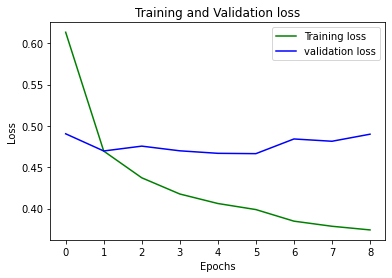

In [42]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,9)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

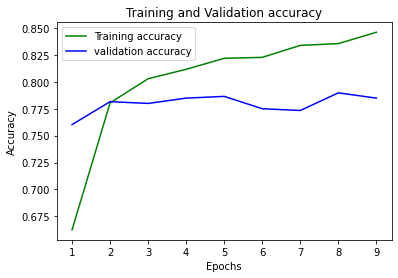

In [44]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,10)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#14-Saving model

In [ ]:
model.save('project.h5')#save model 